In [1]:
import numpy as np  
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re
!pip install keras 

In [2]:
import os
os.getcwd()

'C:\\Users\\marka\\Jupyter Notebook'

In [3]:
data = pd.read_csv('C:\\Users\\marka\\Jupyter Notebook\\IMDB Dataset.csv')

## EDA

In [4]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
review_length = [len(review.split()) for review in data['review']]
data['review_length'] = review_length

In [7]:
dummy = pd.get_dummies(data.sentiment, drop_first=True)
data = pd.concat([data, dummy], axis=1)


In [8]:
data.head()

,review,sentiment,review_length,positive
0,One of the other reviewers has mentioned that ...,positive,307,1
1,A wonderful little production. <br /><br />The...,positive,162,1
2,I thought this was a wonderful way to spend ti...,positive,166,1
3,Basically there's a family where a little boy ...,negative,138,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1


<AxesSubplot:xlabel='positive', ylabel='count'>

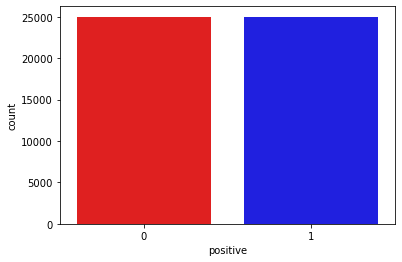

In [9]:
sns.countplot(x='positive', data=data, palette = ["red","blue"])

In [10]:
data.review_length[data["sentiment"] == "positive"].describe()

count    25000.000000
mean       232.849320
std        177.497046
min         10.000000
25%        125.000000
50%        172.000000
75%        284.000000
max       2470.000000
Name: review_length, dtype: float64

In [11]:
data.review_length[data["sentiment"] == "negative"].describe()

count    25000.000000
mean       229.464560
std        164.947795
min          4.000000
25%        128.000000
50%        174.000000
75%        278.000000
max       1522.000000
Name: review_length, dtype: float64

<AxesSubplot:ylabel='Count'>

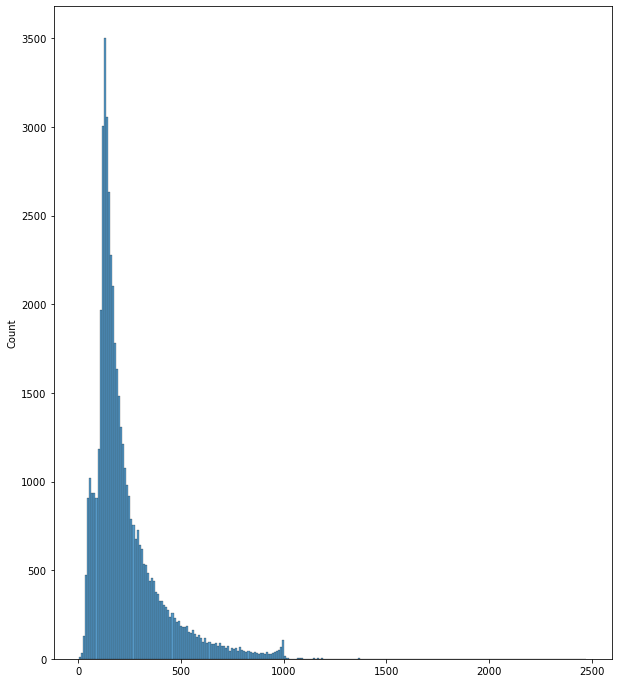

In [12]:
plt.figure(figsize = (10,12))
sns.histplot(review_length, binwidth = 10)

#### Remove HTML from reviews

In [13]:
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result

In [14]:
data["clean_review"] = data.review.apply(remove_tags)

In [15]:
data.head()

,review,sentiment,review_length,positive,clean_review
0,One of the other reviewers has mentioned that ...,positive,307,1,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,162,1,A wonderful little production. The filming tec...
2,I thought this was a wonderful way to spend ti...,positive,166,1,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,138,0,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1,"Petter Mattei's ""Love in the Time of Money"" is..."


#### Remove stopwords from review

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
def remove_stopwords(text):
    stop_words = set(stopwords.words("english")) 
    tokens=word_tokenize(text)
    tokens_without_sw = [word for word in tokens if not word in stop_words]
    filtered_text = ' '.join(tokens_without_sw)
    return filtered_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
data['clean_review'] = data.clean_review.apply(remove_stopwords)
data.head()

,review,sentiment,review_length,positive,clean_review
0,One of the other reviewers has mentioned that ...,positive,307,1,One reviewers mentioned watching 1 Oz episode ...
1,A wonderful little production. <br /><br />The...,positive,162,1,A wonderful little production . The filming te...
2,I thought this was a wonderful way to spend ti...,positive,166,1,I thought wonderful way spend time hot summer ...
3,Basically there's a family where a little boy ...,negative,138,0,Basically 's family little boy ( Jake ) thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1,Petter Mattei 's `` Love Time Money '' visuall...


#### Removing punctuation

In [18]:
import string
def remove_punctuations(text):
    translator = str.maketrans('', '', string.punctuation) 
    return text.translate(translator) 
data['clean_review']=data['clean_review'].apply(remove_punctuations)
data.head()

,review,sentiment,review_length,positive,clean_review
0,One of the other reviewers has mentioned that ...,positive,307,1,One reviewers mentioned watching 1 Oz episode ...
1,A wonderful little production. <br /><br />The...,positive,162,1,A wonderful little production The filming tec...
2,I thought this was a wonderful way to spend ti...,positive,166,1,I thought wonderful way spend time hot summer ...
3,Basically there's a family where a little boy ...,negative,138,0,Basically s family little boy Jake thinks s ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1,Petter Mattei s Love Time Money visually stu...
